## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mdata_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')
mdata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Clean the dupes out of the combined data
mdata_clean_df = mdata_df.drop_duplicates()
mdata_clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mdata_grouped = mdata_clean_df.groupby("Drug Regimen")
mdata_mean = mdata_grouped["Tumor Volume (mm3)"].mean()
mdata_median = mdata_grouped["Tumor Volume (mm3)"].median()
mdata_std = mdata_grouped["Tumor Volume (mm3)"].std()
mdata_sem = mdata_grouped["Tumor Volume (mm3)"].sem()

#Create and display summary statistics dataframe
mdata_summary_df = pd.DataFrame({"Mean":mdata_mean, "Median":mdata_median, "Standard Deviation": mdata_std, "SEM": mdata_sem})
mdata_summary_df


,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.368318,50.909965,6.502160,0.514041
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar plots

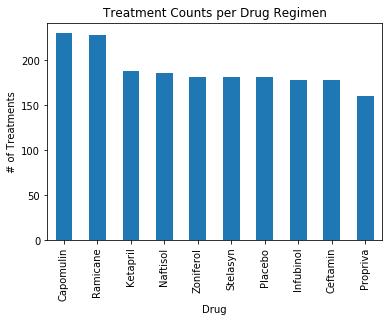

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_bar = mdata_clean_df["Drug Regimen"].value_counts()
drug_bar.plot(kind = "bar")
plt.xlabel("Drug")
plt.ylabel("# of Treatments")
plt.title("Treatment Counts per Drug Regimen")
plt.show()

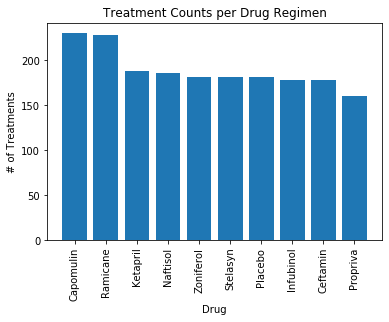

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_bar = mdata_clean_df["Drug Regimen"].value_counts()
x_axis = drug_bar.index.values
plt.bar(x_axis, drug_bar.values)
plt.xticks(rotation="vertical")
plt.xlabel("Drug")
plt.ylabel("# of Treatments")
plt.title("Treatment Counts per Drug Regimen")
plt.savefig("TreatmentsPerDrugBarChart.png")
plt.show()

## Pie plots

In [6]:
#create pie plot variables for ease of plotting
drug_pie = mdata_clean_df["Sex"].value_counts()

# Labels for the sections of our pie chart
labels = drug_pie.index.values

# The values of each section of the pie chart
sizes = drug_pie.values

# The colors of each section of the pie chart
colors = ["lightblue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

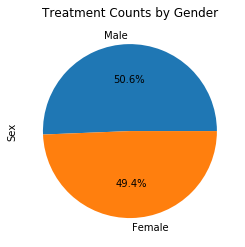

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
drug_pie.plot(kind = "pie",autopct='%1.1f%%')
plt.title("Treatment Counts by Gender")
plt.show()


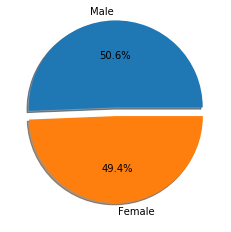

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, explode=explode, labels=labels, 
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.savefig("GenderBreakdownPieChart.png")
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#bestdrugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mdata_mousedeath_df = mdata_clean_df.groupby("Mouse ID")["Timepoint"].max().to_frame().reset_index()
mdata_mousedeath_df.head()

mdata_merged_df = pd.merge(mdata_mousedeath_df, mdata_clean_df, on=("Mouse ID","Timepoint"))
mdata_merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [10]:
#Calculate boxplot data for Capomulin
mdata_Capomulin_df = mdata_merged_df.loc[mdata_merged_df["Drug Regimen"] == "Capomulin"]
mdata_Capomulin_df = mdata_Capomulin_df[["Tumor Volume (mm3)"]]
quartiles1 = mdata_Capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)

print(f"The lower quartile of Total Tumor Volume for Capomulin is: {lowerq1}")
print(f"The upper quartile of Total Tumor Volume for Capomulin is: {upperq1}")
print(f"The interquartile range of Total Tumor Volume for Capomulin is: {iqr1}")
print(f"The the median of temperatures is: {quartiles1[0.5]} ")
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")

The lower quartile of Total Tumor Volume for Capomulin is: 32.37735684
The upper quartile of Total Tumor Volume for Capomulin is: 40.1592203
The interquartile range of Total Tumor Volume for Capomulin is: 7.781863460000004
The the median of temperatures is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [11]:
#Calculate boxplot data for Ramicone
mdata_Ramicane_df = mdata_merged_df.loc[mdata_merged_df["Drug Regimen"] == "Ramicane"]
mdata_Ramicane_df = mdata_Ramicane_df[["Tumor Volume (mm3)"]]
quartiles2 = mdata_Ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)

print(f"The lower quartile of Total Tumor Volume for Ramicane is: {lowerq2}")
print(f"The upper quartile of Total Tumor Volume for Ramicane is: {upperq2}")
print(f"The interquartile range of Total Tumor Volume for Ramicane is: {iqr2}")
print(f"The the median of Total Tumor Volume for Ramicane is: {quartiles2[0.5]} ")
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")

The lower quartile of Total Tumor Volume for Ramicane is: 31.56046955
The upper quartile of Total Tumor Volume for Ramicane is: 40.65900627
The interquartile range of Total Tumor Volume for Ramicane is: 9.098536719999998
The the median of Total Tumor Volume for Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [12]:
#Calculate boxplot data for Infubinol
mdata_Infubinol_df = mdata_merged_df.loc[mdata_merged_df["Drug Regimen"] == "Infubinol"]
mdata_Infubinol_df = mdata_Infubinol_df[["Tumor Volume (mm3)"]]
quartiles3 = mdata_Infubinol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)

print(f"The lower quartile of Total Tumor Volume for Infubinol is: {lowerq3}")
print(f"The upper quartile of Total Tumor Volume for Infubinol is: {upperq3}")
print(f"The interquartile range of Total Tumor Volume for Infubinol is: {iqr3}")
print(f"The the median of Total Tumor Volume for Infubinol is: {quartiles3[0.5]} ")
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")

The lower quartile of Total Tumor Volume for Infubinol is: 54.04860769
The upper quartile of Total Tumor Volume for Infubinol is: 65.52574285
The interquartile range of Total Tumor Volume for Infubinol is: 11.477135160000003
The the median of Total Tumor Volume for Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [13]:
#Calculate boxplot data for Ceftamin
mdata_Ceftamin_df = mdata_merged_df.loc[mdata_merged_df["Drug Regimen"] == "Ceftamin"]
mdata_Ceftamin_df = mdata_Ceftamin_df[["Tumor Volume (mm3)"]]
quartiles4 = mdata_Ceftamin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)

print(f"The lower quartile of Total Tumor Volume for Ceftamin is: {lowerq4}")
print(f"The upper quartile of Total Tumor Volume for Ceftamin is: {upperq4}")
print(f"The interquartile range of Total Tumor Volume for Ceftamin is: {iqr4}")
print(f"The the median of Total Tumor Volume for Ceftamin is: {quartiles4[0.5]} ")
print(f"Values below {lower_bound4} could be outliers.")
print(f"Values above {upper_bound4} could be outliers.")

The lower quartile of Total Tumor Volume for Ceftamin is: 48.72207785
The upper quartile of Total Tumor Volume for Ceftamin is: 64.29983003
The interquartile range of Total Tumor Volume for Ceftamin is: 15.577752179999997
The the median of Total Tumor Volume for Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [14]:
#Show lengths of each of the 4 drug dataframes
print(len(mdata_Capomulin_df))
print(len(mdata_Ramicane_df))
print(len(mdata_Infubinol_df))
print(len(mdata_Ceftamin_df))
mdata_Capomulin_df.head()

25
25
25
25


,Tumor Volume (mm3)
19,38.982878
24,38.939633
61,30.485985
64,37.074024
66,40.159220


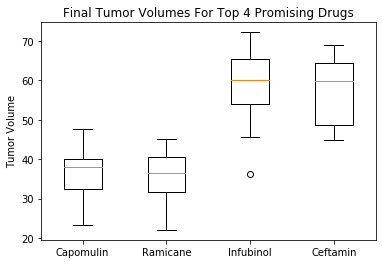

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
plotlist = [mdata_Capomulin_df["Tumor Volume (mm3)"],mdata_Ramicane_df["Tumor Volume (mm3)"],mdata_Infubinol_df["Tumor Volume (mm3)"],mdata_Ceftamin_df["Tumor Volume (mm3)"]]
labels=["Capomulin","Ramicane","Infubinol","Ceftamin"]
ax1.boxplot(plotlist,labels=labels)
ax1.set_title('Final Tumor Volumes For Top 4 Promising Drugs')
ax1.set_ylabel('Tumor Volume')
plt.savefig("TumorVolumesBoxPlot.png")
plt.show()



## Line and scatter plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mdata_mouse1 = mdata_clean_df.loc[mdata_clean_df["Mouse ID"] == "l509"]
#mdata_mouse1

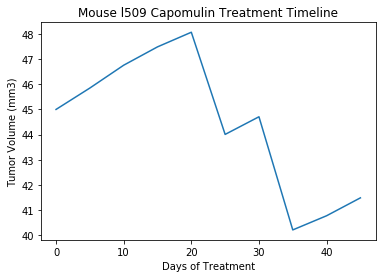

In [17]:
#Display line plot
plt.plot(mdata_mouse1["Timepoint"],mdata_mouse1["Tumor Volume (mm3)"])
plt.title("Mouse l509 Capomulin Treatment Timeline")
plt.xlabel("Days of Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("Mousel509TreatmentTimelineLineChart.png")
plt.show()

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mdata_CapomulinFull_df = mdata_clean_df.loc[mdata_clean_df["Drug Regimen"] == "Capomulin"]
mdata_CapMeans = mdata_CapomulinFull_df.groupby("Mouse ID").mean()
#mdata_CapMeans

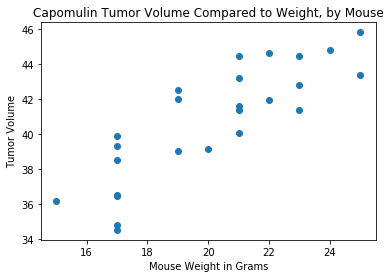

In [19]:
#Display scatter plot
plt.scatter(mdata_CapMeans["Weight (g)"],mdata_CapMeans["Tumor Volume (mm3)"])
plt.title("Capomulin Tumor Volume Compared to Weight, by Mouse")
plt.xlabel("Mouse Weight in Grams")
plt.ylabel("Tumor Volume")
plt.savefig("MouseWeightVsTumorVolumeScatterPlot.png")
plt.show()

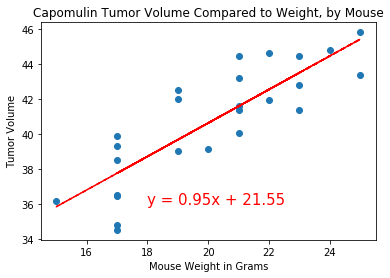

In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
c_slope, c_int, c_r, c_p, c_std_err = st.linregress(mdata_CapMeans["Weight (g)"], mdata_CapMeans["Tumor Volume (mm3)"])
c_fit = c_slope * mdata_CapMeans["Weight (g)"] + c_int
line_eq = "y = " + str(round(c_slope,2)) + "x + " + str(round(c_int,2))
plt.scatter(mdata_CapMeans["Weight (g)"],mdata_CapMeans["Tumor Volume (mm3)"])
plt.title("Capomulin Tumor Volume Compared to Weight, by Mouse")
plt.plot(mdata_CapMeans["Weight (g)"], c_fit, "--",color="r")
plt.annotate(line_eq,(18,36),fontsize=15,color="r")
plt.xlabel("Mouse Weight in Grams")
plt.ylabel("Tumor Volume")
plt.savefig("MouseWeightVsTumorVolumeLinearRegressionPlot.png")
plt.show()